In [70]:
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn import datasets

# Introduction

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −

- Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

- Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

A significant weakness of KNN is the so called 'cold start' problem. Consider a scenario where you wish to recommend movies to someone. KNN could cluster the action movies you've watched with the action movies others have watched and then recommend a movie. However, if a new movie comes out that nobody has watched yet, KNN won't be able to cluster it and will not recommend it, despite it being an action movie that you presumably might like. See if you can think of ways to overcome this weakness!

In [3]:
# we begin again by loading the iris dataset

iris = datasets.load_iris()

# we only take the first two features so its easier to plot

X = iris.data[:, :2]
y = iris.target

In [8]:
# we create an instance of Neighbours Classifier and fit the data.
# for now we choose the parameter 5 for number of neighbors to consider

m = KNeighborsClassifier(5, weights='uniform')
m.fit(X, y)

KNeighborsClassifier()

Text(0, 0.5, 'sepal width (cm)')

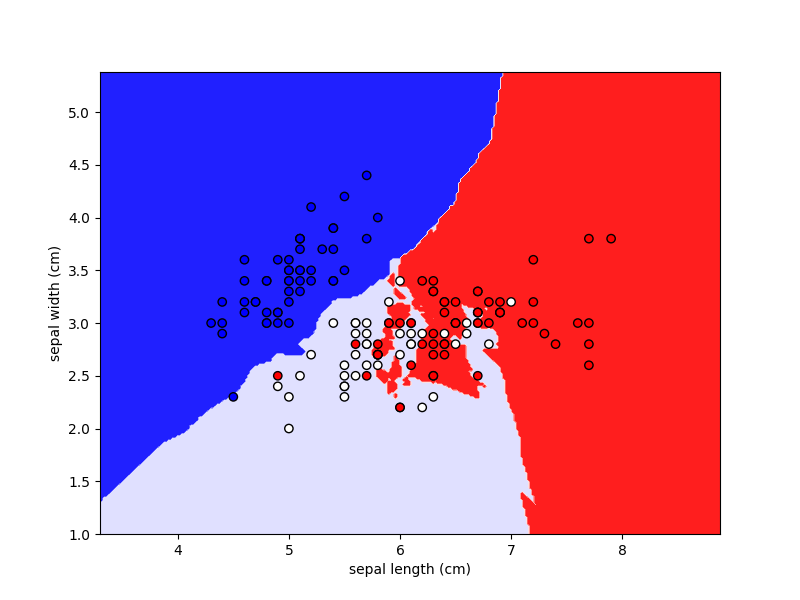

In [18]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = m.predict(np.c_[xx.ravel(), yy.ravel()])

# Generate the decision boundaries
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='bwr')

# Plot the training points
plt.scatter(X[:, 0],
    X[:, 1],
    c=y,
    cmap='bwr',
    alpha=1.0,
    edgecolor="black",
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [21]:
# this time we create the model by considering up to 15 neighbors
# we weigh their contribution to the classifier as a function of their distance

m = KNeighborsClassifier(20, weights='distance')
m.fit(X, y)

KNeighborsClassifier(n_neighbors=20, weights='distance')

Text(0, 0.5, 'sepal width (cm)')

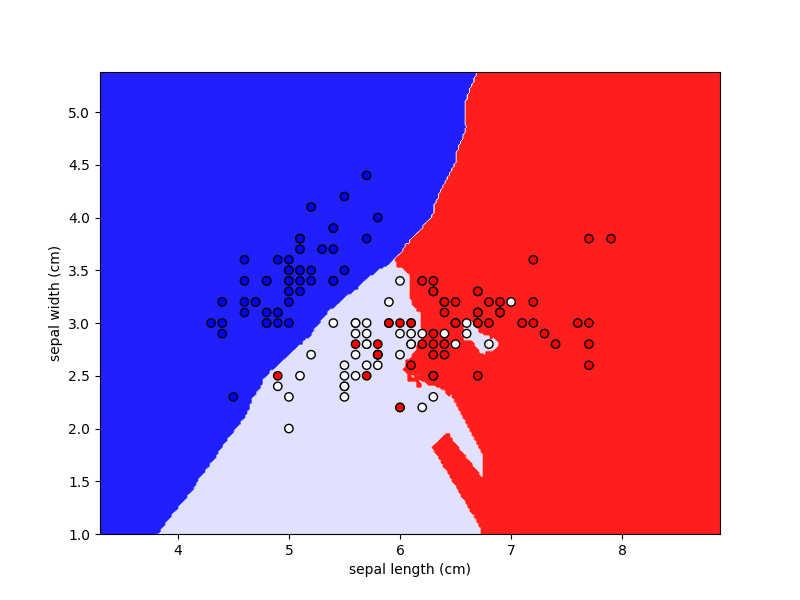

In [22]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = m.predict(np.c_[xx.ravel(), yy.ravel()])

# Generate the decision boundaries
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='bwr')

# Plot the training points
plt.scatter(X[:, 0],
    X[:, 1],
    c=y,
    cmap='bwr',
    alpha=1.0,
    edgecolor="black",
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# as we can see the decision boundary is slightly smoother

# Collaborative Filtering

Collaborative filtering is a technique used by recommender systems. Collaborative filtering has two senses, a narrow one and a more general one

In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person. For example, a collaborative filtering recommendation system for preferences in television programming could make predictions about which television show a user should like given a partial list of that user's tastes (likes or dislikes). Note that these predictions are specific to the user, but use information gleaned from many users. This differs from the simpler approach of giving an average (non-specific) score for each item of interest, for example based on its number of votes.

In the more general sense, collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources, etc. Applications of collaborative filtering typically involve very large data sets. Collaborative filtering methods have been applied to many different kinds of data including: sensing and monitoring data, such as in mineral exploration, environmental sensing over large areas or multiple sensors; financial data, such as financial service institutions that integrate many financial sources; or in electronic commerce and web applications where the focus is on user data, etc. The remainder of this discussion focuses on collaborative filtering for user data, although some of the methods and approaches may apply to the other major applications as well.

### Download dataset
https://grouplens.org/datasets/movielens/20m/

In [29]:
dfr = pd.read_csv('rating.csv')
dfr

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [28]:
dfm = pd.read_csv('movie.csv')
dfm

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [31]:
nusers = len(dfr.userId.unique())
nitems = len(dfr.movieId.unique())

print('This dataset has {} unique users and {} unique movies'.format(nusers, nitems))

This dataset has 138493 unique users and 26744 unique movies


<BarContainer object of 10 artists>

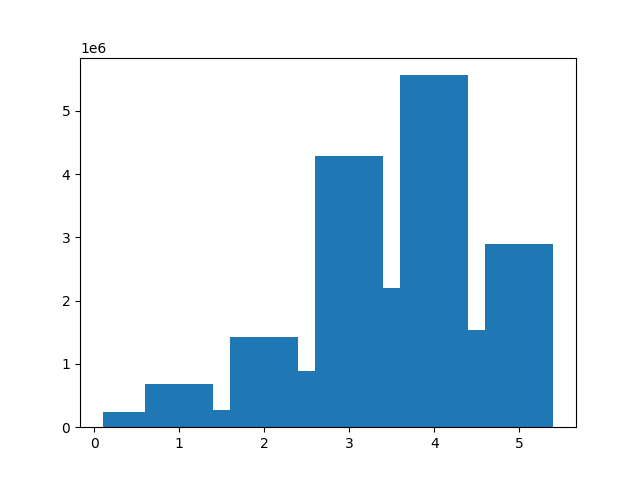

In [45]:
# let us view the relative number of ratings

# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()

plt.bar(np.linspace(0.5,5,10), dfr.groupby('rating').size())

In [51]:
# let us get the number of ratings given by every user
dfu = pd.DataFrame(dfr.groupby('userId').size(), columns=['count'])
dfu

,count
userId,
1,175
2,61
3,187
4,28
5,66
...,...
138489,38
138490,151
138491,22


In [52]:
# then let's get the number of ratings per movie
dfp = pd.DataFrame(dfr.groupby('movieId').size(), columns=['count'])
dfp

,count
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
...,...
131254,1
131256,1
131258,1


In [57]:
# now let's reduce the dataset and remove movies with very few reviews
# and reviews by inactive users

popular_movies = list(set(dfp.query('count >= 50').index))
active_users = list(set(dfu.query('count >= 50').index))

dfr = dfr[dfr.movieId.isin(popular_movies)]
dfr = dfr[dfr.userId.isin(active_users)]

In [58]:
dfr

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [59]:
# let us pivot and create the movie-user matrix
# this is not very efficient and should be done as a sparse matrix
# but to show the result we will run it dense first

mumat = dfr.pivot(index='movieId', columns='userId', values='rating').fillna(0)

In [60]:
mumat

userId,1,2,3,5,7,8,11,13,14,16,...,138474,138475,138477,138483,138484,138486,138487,138490,138492,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,3.0,...,5.0,0.0,3.0,4.0,0.0,5.0,0.0,0.0,0.0,3.5
2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,4.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,4.0
3,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# create dictionary to map from movie title to index
movietoidx = { movie: i for i, movie in
             enumerate(list(dfm.set_index('movieId').loc[mumat.index].title))}

movietoidx

{'Toy Story (1995)': 0,
 'Jumanji (1995)': 1,
 'Grumpier Old Men (1995)': 2,
 'Waiting to Exhale (1995)': 3,
 'Father of the Bride Part II (1995)': 4,
 'Heat (1995)': 5,
 'Sabrina (1995)': 6,
 'Tom and Huck (1995)': 7,
 'Sudden Death (1995)': 8,
 'GoldenEye (1995)': 9,
 'American President, The (1995)': 10,
 'Dracula: Dead and Loving It (1995)': 11,
 'Balto (1995)': 12,
 'Nixon (1995)': 13,
 'Cutthroat Island (1995)': 14,
 'Casino (1995)': 15,
 'Sense and Sensibility (1995)': 16,
 'Four Rooms (1995)': 17,
 'Ace Ventura: When Nature Calls (1995)': 18,
 'Money Train (1995)': 19,
 'Get Shorty (1995)': 20,
 'Copycat (1995)': 21,
 'Assassins (1995)': 22,
 'Powder (1995)': 23,
 'Leaving Las Vegas (1995)': 24,
 'Othello (1995)': 25,
 'Now and Then (1995)': 26,
 'Persuasion (1995)': 27,
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)': 28,
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)': 29,
 'Dangerous Minds (1995)': 30,
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)': 

In [69]:
# let us transform the matrix into a sparse datastructure for efficiency

mumatcsr = csr_matrix(mumat.values)
mumatcsr

<10524x85307 sparse matrix of type '<class 'numpy.float64'>'
	with 18187272 stored elements in Compressed Sparse Row format>

## Distance Metrics
Take a moment to read through the various ways of measuring distance in various vector spaces.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric

And the ways of measuring pairwise distance

https://scikit-learn.org/stable/modules/metrics.html

In [71]:
# let us create our model!
# we are using a 'K' Nearest Neighbors search model
# we will be using cosine similarity as the pairwise scoring metric
# we will be keeping the number of negihbors limited to 20

m = NearestNeighbors(metric='cosine', n_neighbors=20, n_jobs=-1)
m.fit(mumatcsr)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=20)

In [75]:
# this is not necessary but it lets you make small spelling mistakes
# when searching for movie title names :)

from fuzzywuzzy import fuzz

In [83]:
# let us create a helper function to utilize the movie name dict
# and call the model we just created

def match(moviedict, moviename):
    matchlist = []

    # start by finding movie names in dictionary
    for title, idx in moviedict.items():
        ratio = fuzz.ratio(title.lower(), moviename.lower())
        if ratio >= 60:
            matchlist.append((title, idx, ratio))
            
    # sort the potential hits by fuzz ratio
    matchlist = sorted(matchlist, key=lambda x: x[2])[::-1]
    
    if not matchlist:
        print('No matches!')
        return
    
    for m in matchlist:
        print('Possible match: '+str(m[0]))
    #return best match
    return matchlist[0][1]


In [97]:
# let's try it out

match(movietoidx, "die hard")

Possible match: Die Hard (1988)
Possible match: Die Hard 2 (1990)


929

In [101]:
# let us make a helper function to recommend movies

def recommender(m, data, mdict, moviename, n):
    # fit the model again (not strictly necessary)
    m.fit(data)
    
    # guess the id of the entered movie name
    idx = match(mdict, moviename)
    
    # calculate distances for n neighbors
    dist, idxs = m.kneighbors(data[idx], n_neighbors=n+1)
    
    # generate the list of raw recommendations
    recommend = sorted(list(zip(idxs.squeeze().tolist(), dist.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    
    # flip the name dictionary
    mdictr = {v:k for k, v in mdict.items()}
    
    for i, (idx_r, dis_r) in enumerate(recommend):
        print(str(mdictr[idx_r]) + " - " + str(dis_r))

In [102]:
recommender(m, mumatcsr, movietoidx, "jumanji", 5)

Possible match: Jumanji (1995)
Home Alone (1990) - 0.465666622813633
Jurassic Park (1993) - 0.45546546743683747
Mrs. Doubtfire (1993) - 0.4513775757131495
Lion King, The (1994) - 0.4503671854524347
Mask, The (1994) - 0.4389611101626225
